In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'C:/Users/samue/OneDrive/Documents/Data-Science-Studies/Best_Cities_Remote_Work_Brazil/data/ips_brasil_municipios.csv'  
df = pd.read_csv(file_path, encoding='utf-8')

# List of Brazil's capital cities
capital_cities = [
    "Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Brasília",
    "Vitória", "Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte",
    "Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro",
    "Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis",
    "São Paulo", "Aracaju", "Palmas"
]

# Filter to only capitals
df['CityName'] = df['Município'].str.extract(r'^(.*)\s\(')[0]
capitals_df = df[df['CityName'].isin(capital_cities)].copy()

# Define indicator columns by theme
transport_cols = [
    'Mortes por Acidente de Transporte', 'Densidade de Internet Banda Larga Fixa',
    'Cobertura de Internet Móvel (4G/5G)', 'Áreas Verdes Urbanas',
    'Emissões de CO₂ por Habitante'
]

health_cols = [
    'Expectativa de Vida', 'Obesidade',
    'Mortalidade por Doenças Crônicas Não Transmissíveis',
    'Mortalidade Infantil até 5 Anos', 'Subnutrição',
    'Cobertura Vacinal (Poliomielite)', 'Hospitalizações por Condições Sensíveis à Atenção Primária'
]

safety_cols = [
    'Segurança Pessoal', 'Assassinatos de Jovens', 'Assassinatos de Mulheres',
    'Homicídios', 'Violência contra Mulheres', 'Violência contra Negros',
    'Violência contra Indígenas', 'Suicídios'
]

quality_life_cols = [
    'Índice de Progresso Social', 'Necessidades Humanas Básicas',
    'Fundamentos do Bem-estar', 'Oportunidades', 'Qualidade do Meio Ambiente',
    'Direitos Individuais', 'Liberdades Individuais e de Escolha',
    'Acesso à Cultura, Lazer e Esporte'
]

internet_cols = [
    'Cobertura de Internet Móvel (4G/5G)',
    'Densidade de Internet Banda Larga Fixa',
    'Densidade de Telefonia Móvel',
    'Qualidade de Internet Móvel'
]

# Normalize data
scaler = MinMaxScaler()
all_cols = list(set(transport_cols + health_cols + safety_cols + quality_life_cols + internet_cols))
capitals_df_scaled = capitals_df.copy()

# Invert indicators where lower values are better
invert_cols = [
    'Mortes por Acidente de Transporte', 'Assassinatos de Jovens',
    'Assassinatos de Mulheres', 'Homicídios', 'Suicídios',
    'Mortalidade por Doenças Crônicas Não Transmissíveis',
    'Mortalidade Infantil até 5 Anos', 'Subnutrição',
    'Hospitalizações por Condições Sensíveis à Atenção Primária',
    'Violência contra Mulheres', 'Violência contra Negros',
    'Violência contra Indígenas', 'Emissões de CO₂ por Habitante'
]

for col in all_cols:
    if col in invert_cols:
        capitals_df_scaled[col] = capitals_df[col].max() - capitals_df[col]
    else:
        capitals_df_scaled[col] = capitals_df[col]

# Apply Min-Max scaling
capitals_df_scaled[all_cols] = scaler.fit_transform(capitals_df_scaled[all_cols])

# Calculate thematic scores
capitals_df_scaled['Transport Score'] = capitals_df_scaled[transport_cols].mean(axis=1)
capitals_df_scaled['Health Score'] = capitals_df_scaled[health_cols].mean(axis=1)
capitals_df_scaled['Safety Score'] = capitals_df_scaled[safety_cols].mean(axis=1)
capitals_df_scaled['Quality of Life Score'] = capitals_df_scaled[quality_life_cols].mean(axis=1)
capitals_df_scaled['Internet Score'] = capitals_df_scaled[internet_cols].mean(axis=1)

# Overall score now includes Internet
capitals_df_scaled['Overall Score'] = capitals_df_scaled[[
    'Transport Score', 'Health Score', 'Safety Score',
    'Quality of Life Score', 'Internet Score'
]].mean(axis=1)

# Final ranking
final_ranking = capitals_df_scaled[['CityName', 'UF', 'Overall Score',
                                     'Transport Score', 'Health Score',
                                     'Safety Score', 'Quality of Life Score',
                                     'Internet Score']].sort_values(by='Overall Score', ascending=False)

# Show top 5
print(final_ranking.head())


          CityName  UF  Overall Score  Transport Score  Health Score  \
2    Florianópolis  SC       0.838068         0.830241      0.810846   
25        Brasília  DF       0.791257         0.777189      0.659726   
15       São Paulo  SP       0.782322         0.806164      0.693391   
1   Belo Horizonte  MG       0.780438         0.815729      0.660726   
12        Curitiba  PR       0.768548         0.829956      0.645730   

    Safety Score  Quality of Life Score  Internet Score  
2       0.786365               0.793478        0.969409  
25      0.722638               0.928481        0.868253  
15      0.734208               0.782996        0.894849  
1       0.679671               0.840810        0.905256  
12      0.626256               0.805079        0.935717  


C:\Users\samue\AppData\Local\Temp\ipykernel_19360\1453492839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Overall Score', y='CityName', palette='viridis')


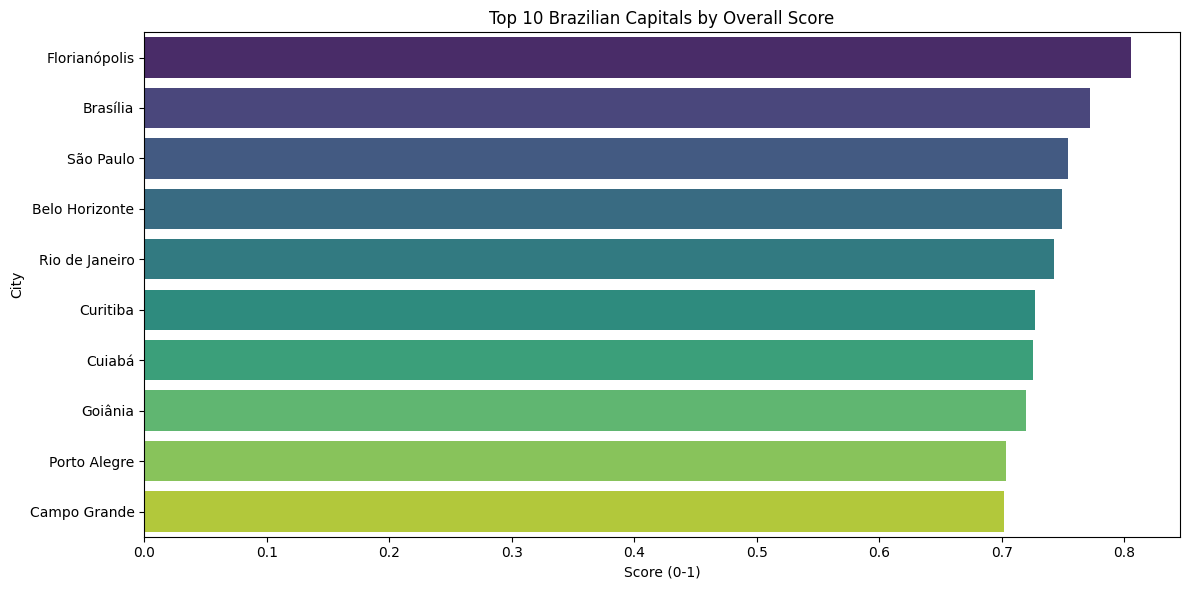

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

top_cities = final_ranking.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='Overall Score', y='CityName', palette='viridis')
plt.title('Top 10 Brazilian Capitals by Overall Score')
plt.xlabel('Score (0-1)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_19360\3864579913.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_health, y='CityName', x='Health Score', palette='Greens_r')


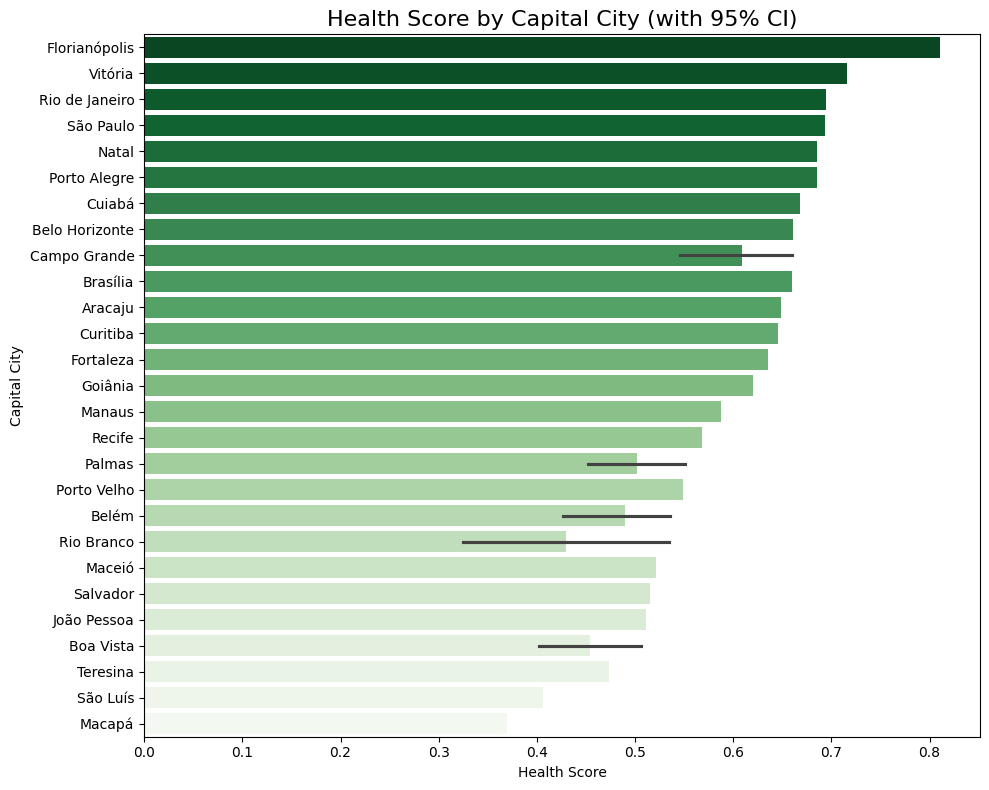

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_health = capitals_df_scaled.sort_values(by='Health Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_health, y='CityName', x='Health Score', palette='Greens_r')
plt.title('Health Score by Capital City (with 95% CI)', fontsize=16)
plt.xlabel('Health Score')
plt.ylabel('Capital City')
plt.tight_layout()
plt.show()


C:\Users\samue\AppData\Local\Temp\ipykernel_19360\2347666909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_safety, y='CityName', x='Safety Score', palette='Reds_r')


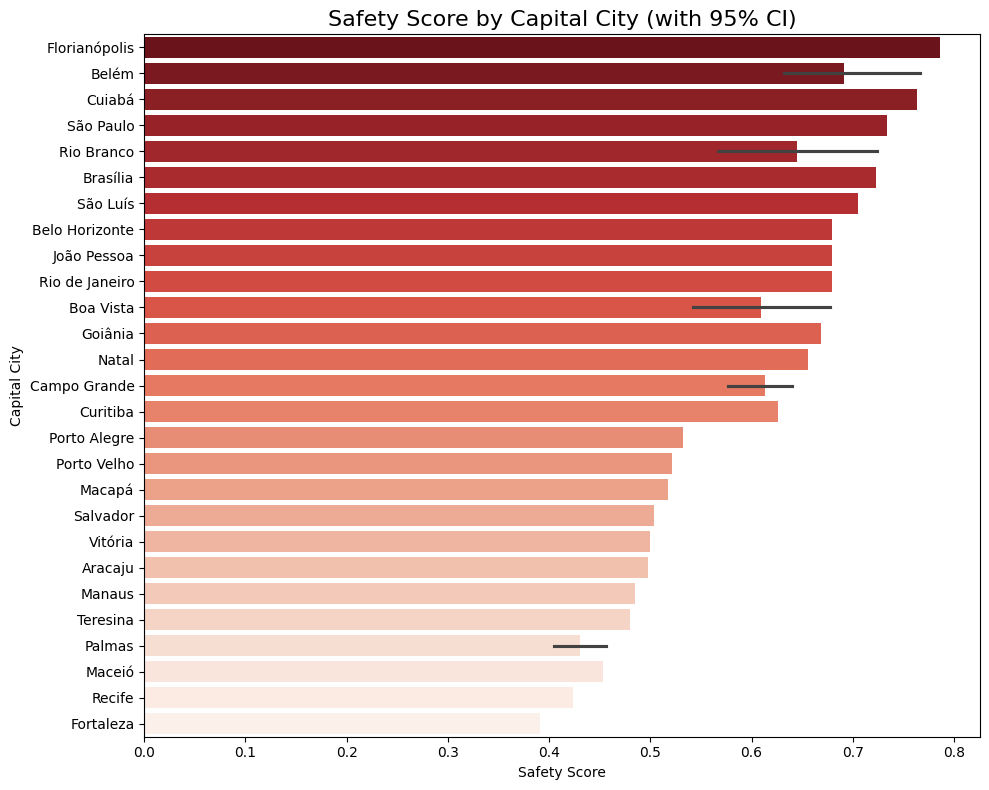

In [4]:
# Sort by Safety Score
df_safety = capitals_df_scaled.sort_values(by='Safety Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_safety, y='CityName', x='Safety Score', palette='Reds_r')
plt.title('Safety Score by Capital City (with 95% CI)', fontsize=16)
plt.xlabel('Safety Score')
plt.ylabel('Capital City')
plt.tight_layout()
plt.show()


C:\Users\samue\AppData\Local\Temp\ipykernel_19360\259240859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_quality, y='CityName', x='Quality of Life Score', palette='Blues_r')


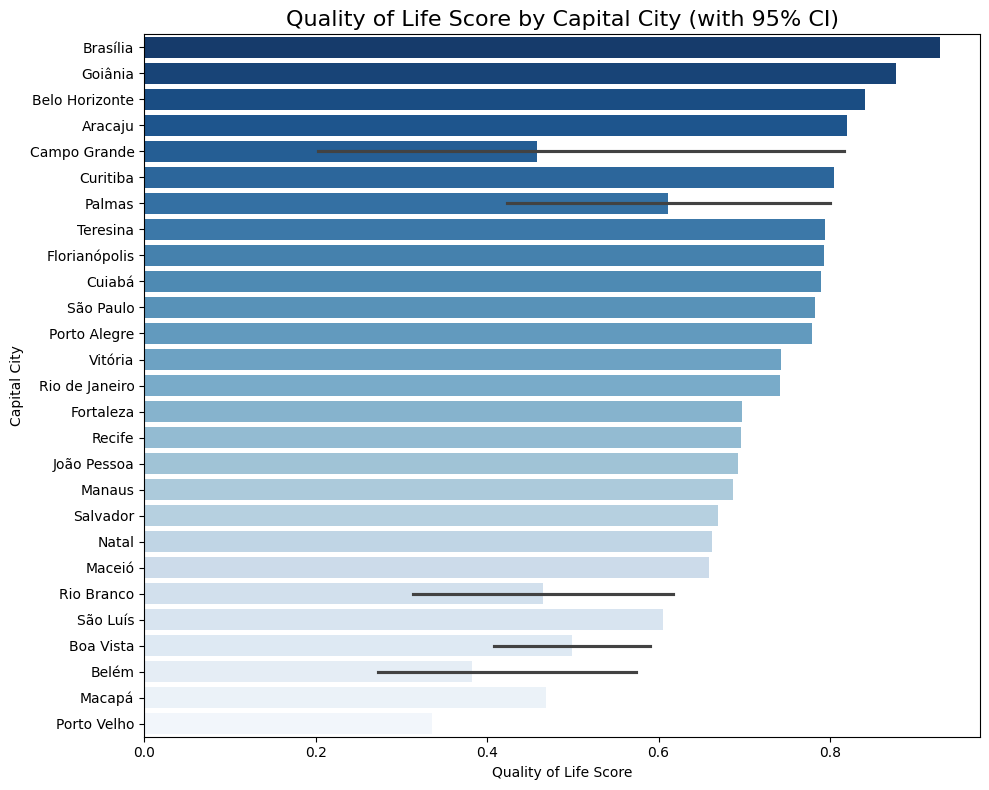

In [5]:
# Sort by Quality of Life Score
df_quality = capitals_df_scaled.sort_values(by='Quality of Life Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_quality, y='CityName', x='Quality of Life Score', palette='Blues_r')
plt.title('Quality of Life Score by Capital City (with 95% CI)', fontsize=16)
plt.xlabel('Quality of Life Score')
plt.ylabel('Capital City')
plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_19360\490127241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_quality, y='CityName', x='Transport Score', palette='Oranges_r')


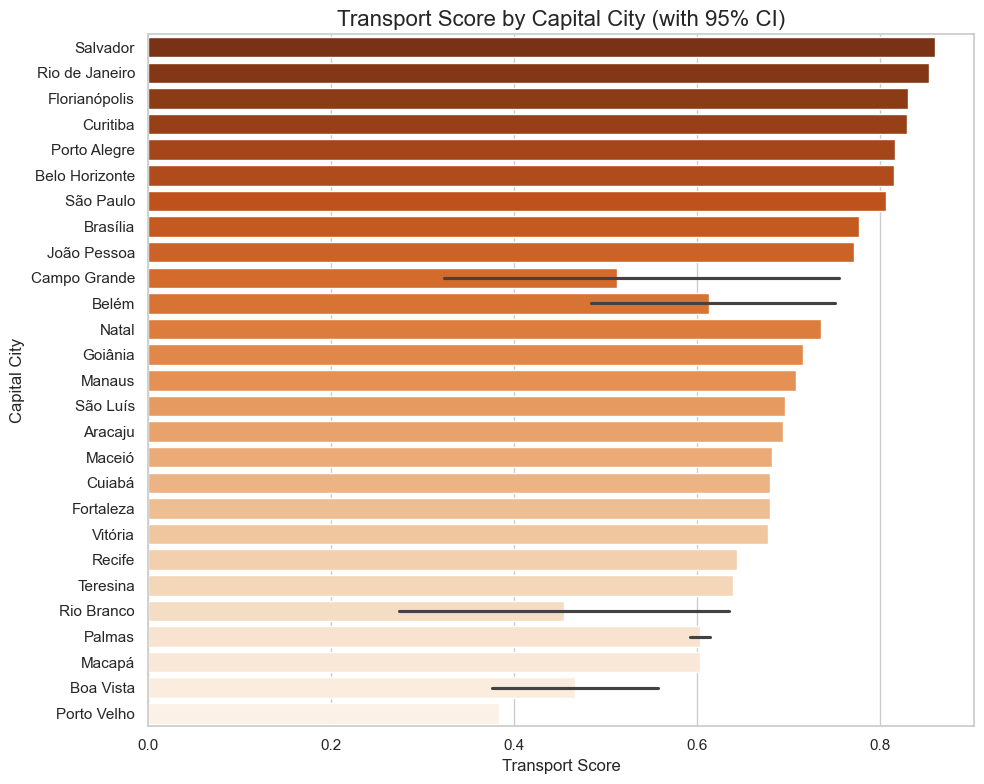

In [13]:
# Sort values for better visual
df_quality = capitals_df_scaled.sort_values(by='Transport Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_quality, y='CityName', x='Transport Score', palette='Oranges_r')
plt.title('Transport Score by Capital City (with 95% CI)', fontsize=16)
plt.xlabel('Transport Score')
plt.ylabel('Capital City')
plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_19360\3611930826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_quality, y='CityName', x='Internet Score', palette='Purples_r')


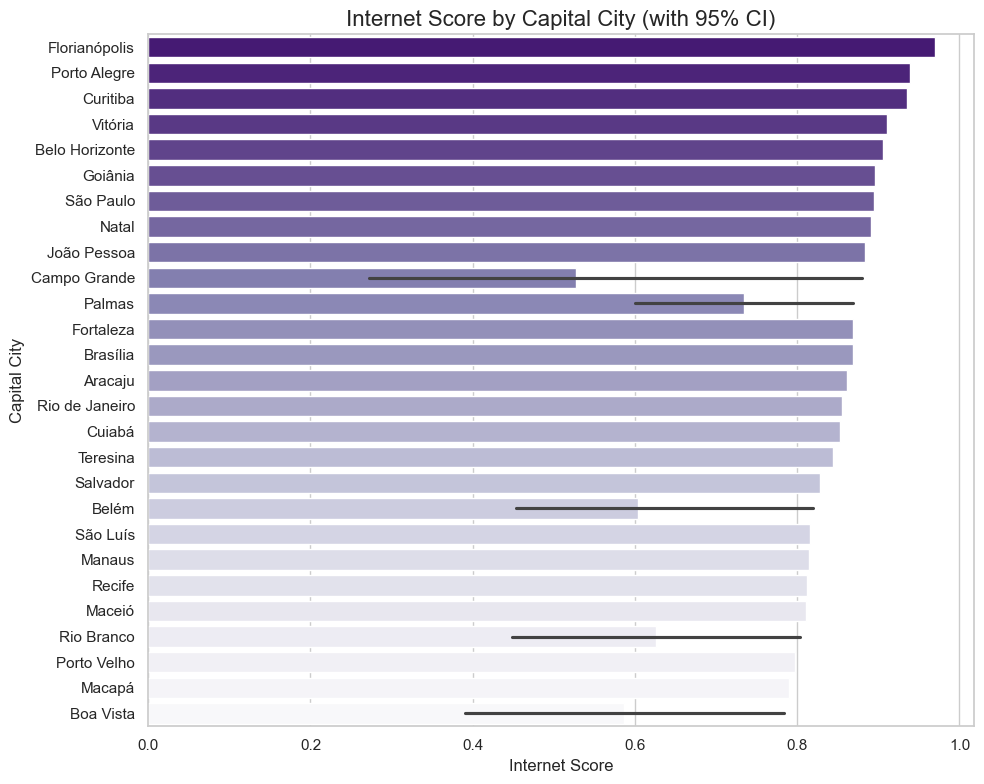

In [12]:
df_quality = capitals_df_scaled.sort_values(by='Internet Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_quality, y='CityName', x='Internet Score', palette='Purples_r')
plt.title('Internet Score by Capital City (with 95% CI)', fontsize=16)
plt.xlabel('Internet Score')
plt.ylabel('Capital City')
plt.tight_layout()
plt.show()